#### [PREV](1.OOP_Single_Feature_Linear_Regression.ipynb) | [HOME](../README.md) | [NEXT](3.OOP_Polynomial_Liner_Regression.ipynb)

---

# OOP Multiple Feature Linear Regression Implementation

This Jupyter Notebook provides a basic implementation of Multiple Feature Linear Regression. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects wing size given the other measurements we have.

#### Step 1 - Import Dependencies

In [25]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression

#### Step 2 - Import Data

In [26]:
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects.head()

,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0


#### Step 3: Instantiate a LinearRegression Object

In [27]:
insects_regression = LinearRegression()

#### Step 4: Fit the model

In [28]:
X_insects = insects[['continent', 'latitude', 'sex']]
y_insects = insects['wingsize']
insects_regression.fit(X_insects, y_insects)

LinearRegression()

#### Step 5: Predict Values

In [29]:
wing_size_predictions = insects_regression.predict(X_insects)

#### Step 5: Plot the Predictions

Text(0, 0.5, 'Predicted Wing Span')

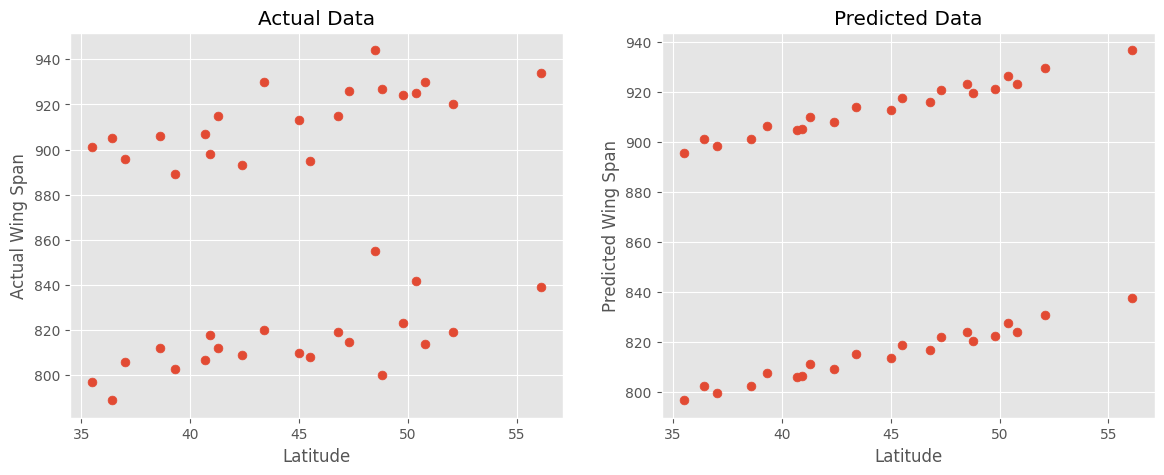

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(insects.latitude, insects.wingsize, s=40)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Actual Wing Span")


axs[1].scatter(insects.latitude, wing_size_predictions, s=40)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Predicted Wing Span")

#### Step 6: Evaluate The Model

In [ ]:
table = pd.DataFrame({
    'Target': y_insects,
    'Predicted result': wing_size_predictions,
    'Loss': y_insects - insects_regression.predict(X_insects).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

    Target  Predicted result   Loss
0      901        895.673491   5.33
1      896        898.362405  -2.36
2      906        901.230580   4.77
3      907        904.995060   2.00
4      898        905.353582  -7.35
5      893        908.042496 -15.04
6      913        912.703280   0.30
7      915        915.929977  -0.93
8      927        919.515195   7.48
9      924        921.307805   2.69
10     930        923.100414   6.90
11     905        901.415744   3.58
12     889        906.614311 -17.61
13     915        910.199529   4.80
14     930        913.964009  16.04
15     895        917.728488 -22.73
16     926        920.955185   5.04
17     944        923.106316  20.89
18     925        926.512274  -1.51
19     920        929.559710  -9.56
20     934        936.730147  -2.73
21     797        796.816349   0.18
22     806        799.505263   6.49
23     812        802.373438   9.63
24     807        806.137917   0.86
25     818        806.496439  11.50
26     809        809.185353